# FMA: A Dataset For Music Analysis

Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, Xavier Bresson, EPFL LTS2.

## Analysis

TODO:
* Figures and tables for the paper.
* Genre tree with number of tracks per genre.
* Genre distribution for dataset and subsets.
* Histogram of durations
* Cumulative number of songs per year
* Artist / album effect: number of songs per artist, artists per genre.

In [1]:
%matplotlib inline

import utils
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os.path
import ast

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
DATA_DIR = os.environ.get('DATA_DIR')
tracks = pd.read_csv(os.path.join(DATA_DIR, 'tracks.csv'), index_col=0, converters={'genres': ast.literal_eval})
features = pd.read_csv(os.path.join(DATA_DIR, 'features.csv'), index_col=0, header=[0, 1, 2])

## 1 Genres

Analysis
* Genre hierarchy
* Top- and sub-genres

Todo
* First plateau should be flat, no cross-over top genres

Observations
* Genres appearing most are the ones selected in the dataset.
* Most songs only have one genre.

In [3]:
enc = MultiLabelBinarizer()
genres_indicator = enc.fit_transform(tracks['genres'])
genres_names = enc.classes_
cross_correlation = genres_indicator.T @ genres_indicator

/home/ubuntu/.pyenv/versions/3.6.0/envs/fma/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


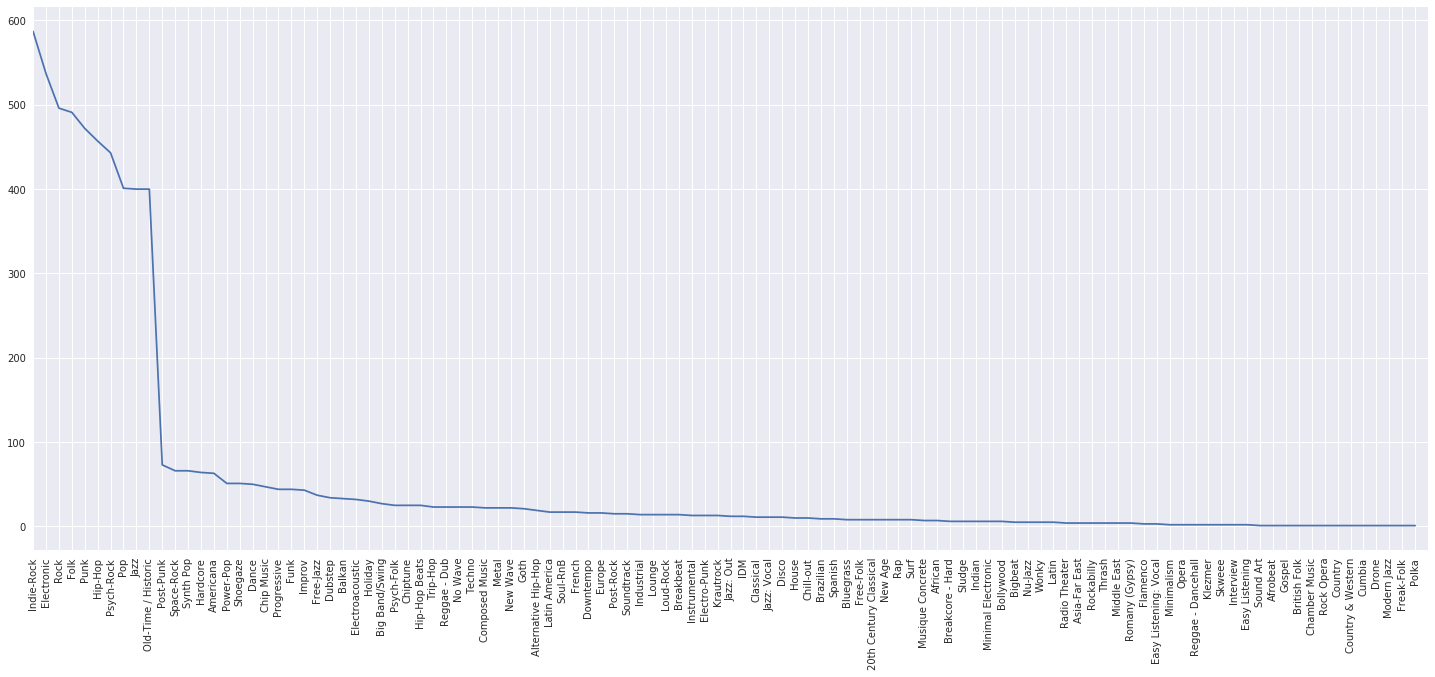

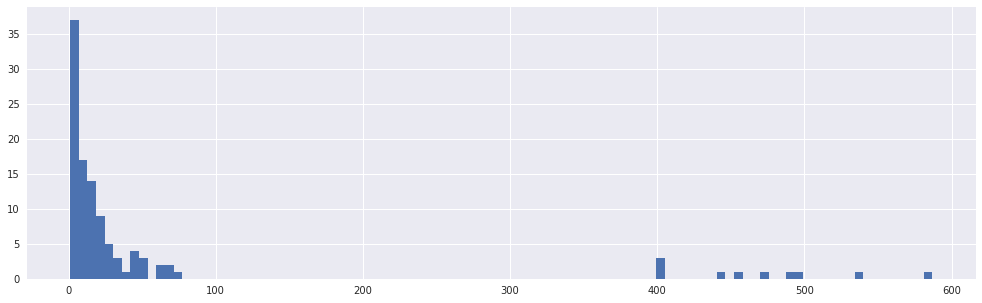

In [4]:
genres_count = cross_correlation.diagonal()
sort = np.argsort(genres_count)[::-1]
genres_count = genres_count[sort]

plt.figure(figsize=(25, 10))
plt.plot(genres_count)
plt.xticks(range(len(genres_names)), genres_names[sort], rotation=90);
plt.xlim((0, len(genres_names)))

plt.figure(figsize=(17, 5))
plt.hist(genres_count, bins=100);

/home/ubuntu/.pyenv/versions/3.6.0/envs/fma/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


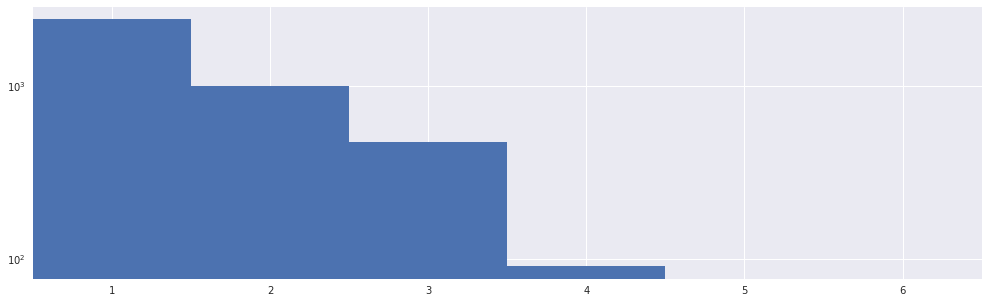

In [5]:
plt.figure(figsize=(17, 5))
tmp = genres_indicator.sum(axis=1)
plt.hist(tmp, bins=range(0, tmp.max()))
plt.yscale('log')
plt.xlim((1, tmp.max()+1))
plt.xticks(np.arange(tmp.max())+1.5, np.arange(tmp.max())+1);

/home/ubuntu/.pyenv/versions/3.6.0/envs/fma/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/ubuntu/.pyenv/versions/3.6.0/envs/fma/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


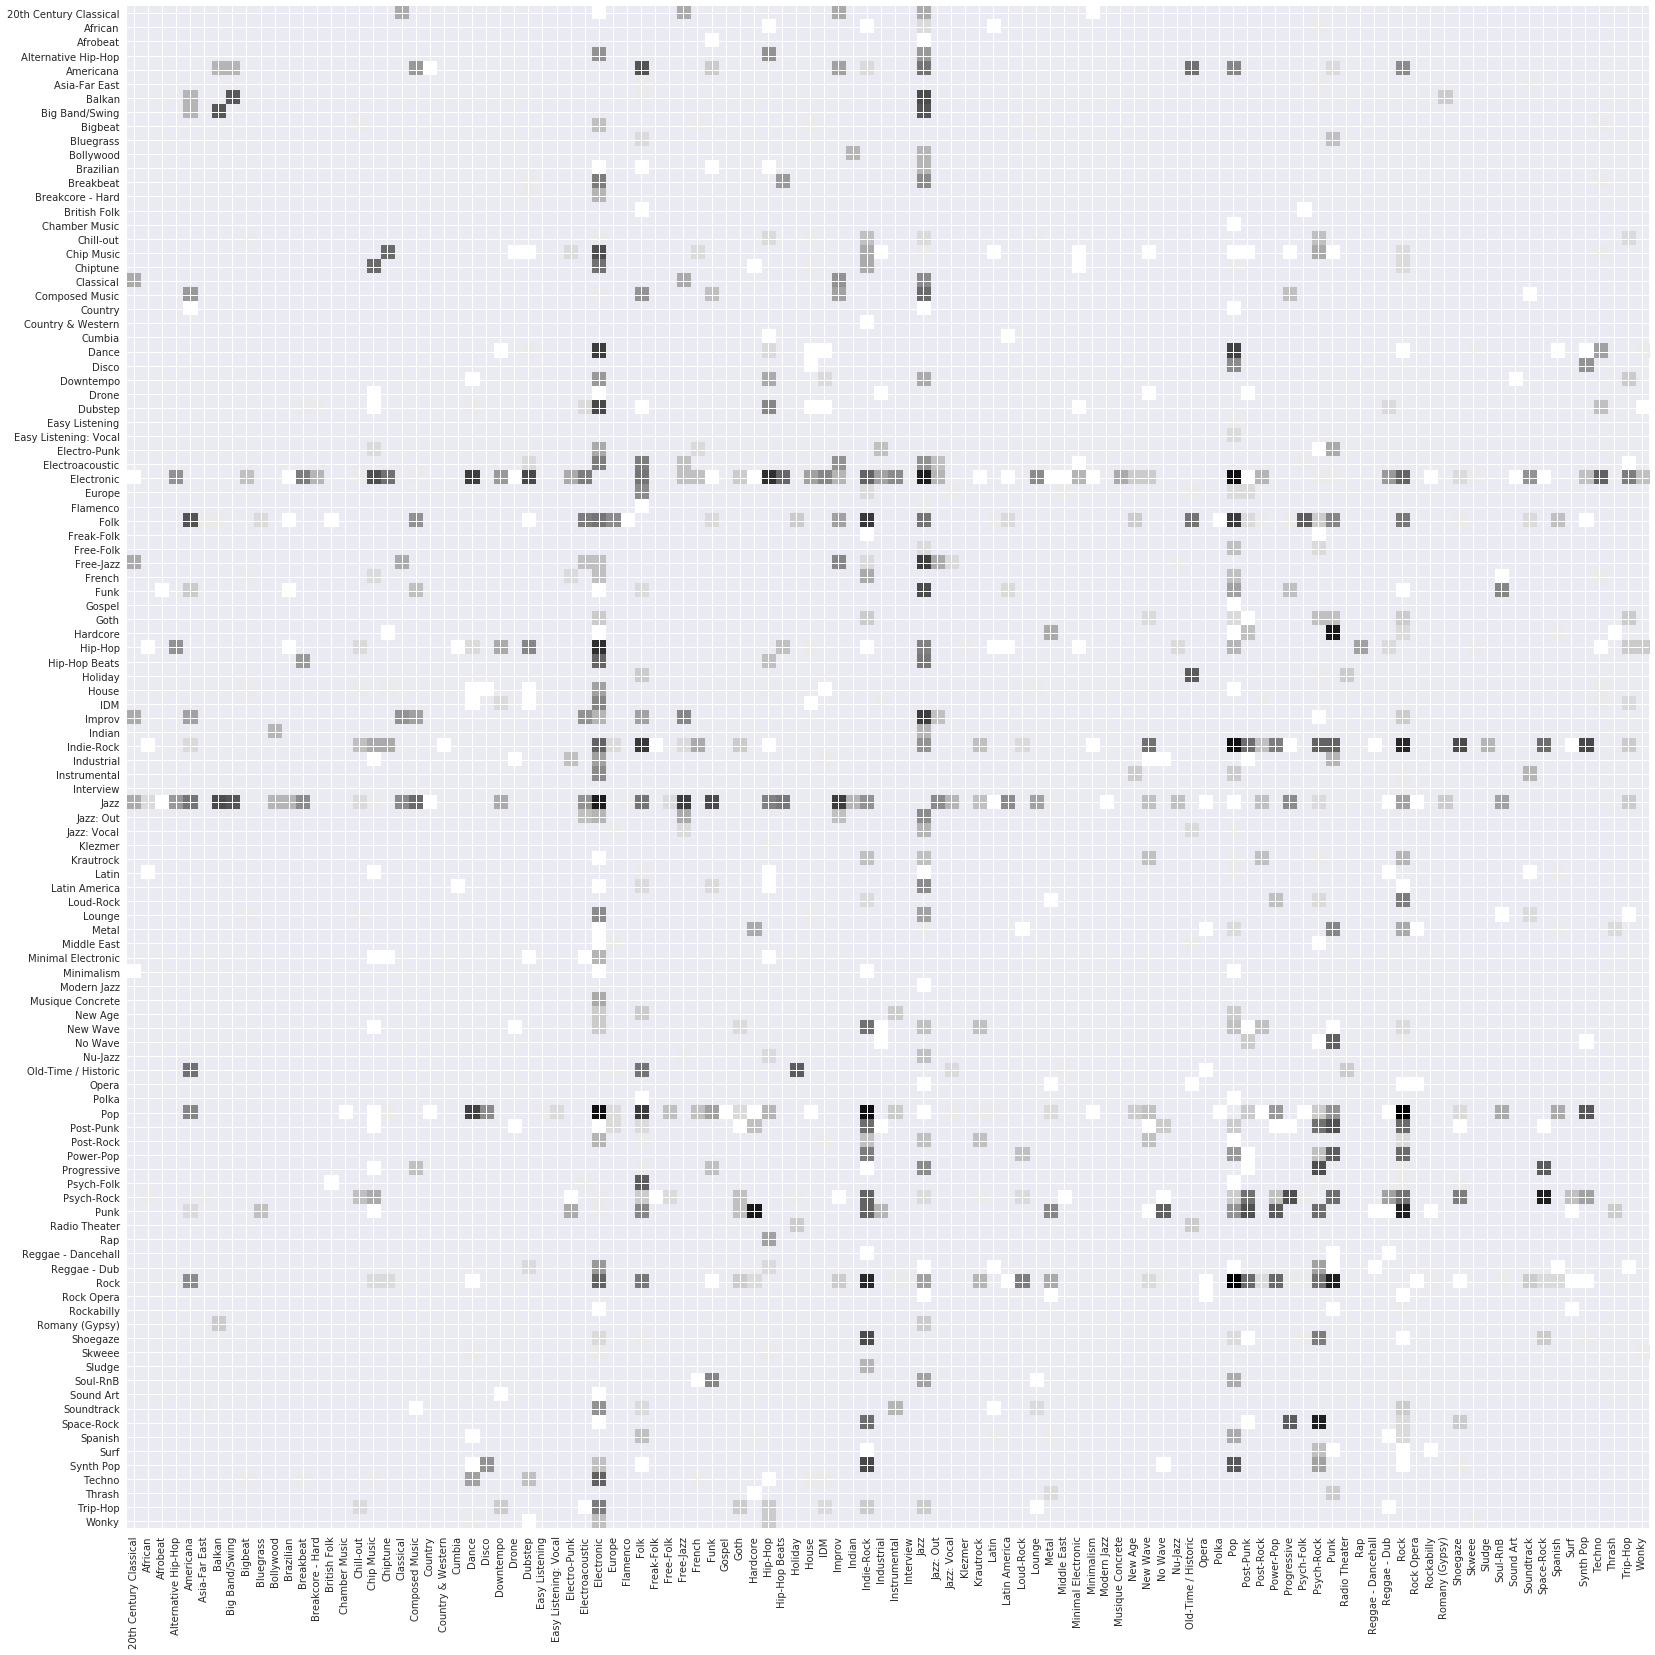

In [6]:
np.fill_diagonal(cross_correlation, 0)

plt.figure(figsize=(28, 28))
plt.imshow(np.log(cross_correlation))
plt.yticks(range(len(genres_names)), genres_names);
plt.xticks(range(len(genres_names)), genres_names, rotation=90);

/home/ubuntu/.pyenv/versions/3.6.0/envs/fma/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


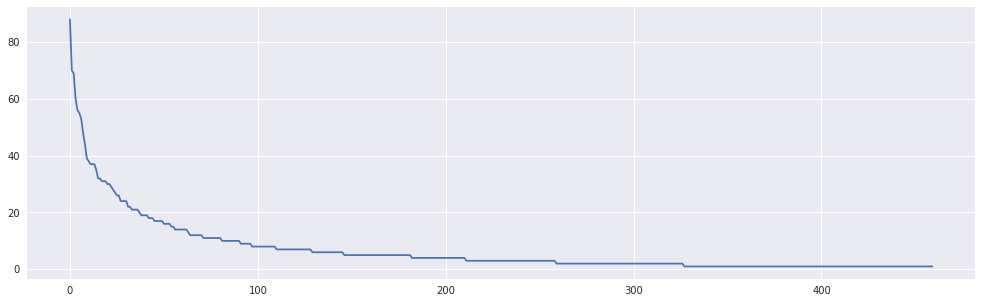

In [7]:
cross_correlation = np.tril(cross_correlation, k=-1)
sort = np.argsort(cross_correlation.flatten())
tmp = cross_correlation.flatten()[sort]

plt.figure(figsize=(17, 5))
plt.plot(tmp[tmp>0][::-1]);

In [8]:
N = 20
indices = np.unravel_index(sort[:-N:-1], cross_correlation.shape)
for i, j in zip(*indices):
    print('{}: {} | {}'.format(cross_correlation[i, j], genres_names[i], genres_names[j]))

88: Rock | Pop
70: Pop | Indie-Rock
69: Pop | Electronic
60: Punk | Hardcore
56: Jazz | Electronic
55: Space-Rock | Psych-Rock
53: Rock | Punk
48: Rock | Indie-Rock
44: Hip-Hop | Electronic
39: Indie-Rock | Folk
38: Pop | Folk
37: Jazz | Improv
37: Electronic | Dance
37: Jazz | Free-Jazz
35: Pop | Dance
32: Electronic | Dubstep
32: Synth Pop | Indie-Rock
31: Jazz | Balkan
31: Shoegaze | Indie-Rock


## 2 Artists

## 3 Audio

e.g. audio features (echonest / librosa) to show diversity

## 4 Features

In [9]:
features.head(5).style.format('{:.2f}')

/home/ubuntu/.pyenv/versions/3.6.0/envs/fma/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


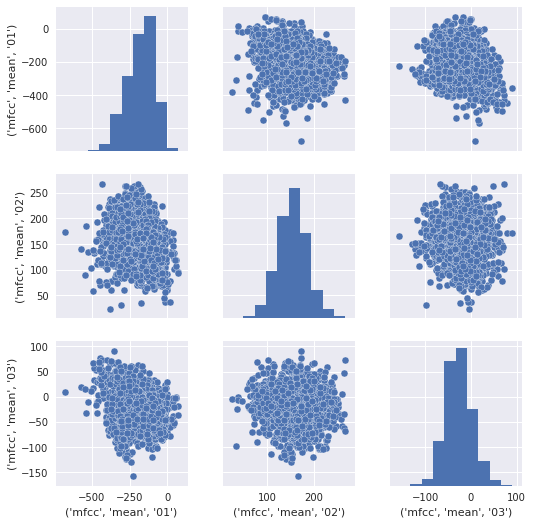

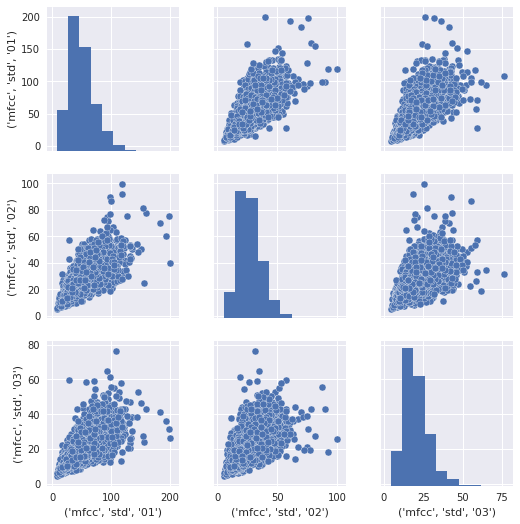

In [10]:
sns.pairplot(features.loc[:, ('mfcc', 'mean', slice('01','03'))]);
sns.pairplot(features.loc[:, ('mfcc', 'std', slice('01','03'))]);

## 5 Echonest features

Todo:
* Percentage of available fields